# Processo de Análise de Dados

## **1 - Definição do Problema**
## **2 - Carregando os Dados**
## **3 - Ánalise Exploratória**
## **4 – Criação dos gráficos**
## **5 – Apresentação dos Resultados**



# Definição do Problema

- **Demonstre uma análise de correlação entre as variáveis.**
- **Qual a renda por cada estado?**
- **Número de pessoas por altura e sexo(feminino e masculino) em cada Estado?**
- **Número de pessoas por altura e Cútis em cada Estado?**
- **Quais os 10 Estados que mais responderam o estudo?** 
- **Quais os 10 Estados que menos responderam o estudo?**

## **Sobre estes dados**

A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

Fonte dos Dados:
https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

Variáveis utilizadas
Renda
Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

Idade
Idade do morador na data de referência em anos.

Altura (elaboração própria)
Altura do morador em metros.

## **O que você pode fazer com esses dados**
Você pode usar esses dados para descobrir aspectos relevantes de um Estado do Brasil. Por exemplo:

- **Qual a renda por cada estado?**
- **Quais estados a população estuda mais?**
- **Número de pessoas por altura e sexo(feminino e masculino) em cada Estado?**
- **Número de pessoas por altura e Cútis em cada Estado?**

# Preparação e Exploração de Dados

## Indentificação das Variáveis


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random as random

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
#Carregando Dataset
df = pd.read_csv('C:/ProjetosNovos/Renda/dados.csv')

In [3]:
#Dimensão do dataset
print("Dimensão:", df.shape)

Dimensão: (76840, 7)


In [4]:
#Visualizando o dataset
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
df.head( )

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
#Visualizando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [6]:
df.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


## Análise Exploratória

In [7]:
#Verificando as colunas.

In [8]:
df.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [9]:
#Verificando os tipos de dados.

In [10]:
df.dtypes

UF                  int64
Sexo                int64
Idade               int64
Cor                 int64
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object

In [11]:
#Verificando os dados duplicados.

In [12]:
df[df.duplicated()]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura


In [13]:
#Verificando os dados nulos.

In [14]:
(df.isnull().sum())

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [15]:
#Substituindo códigos das UF´s por siglas e transformando para string.
df["UF"] = df["UF"].astype(str)
df["UF"] = df["UF"].map(
    {"11": "RO", "12": "AC", "13": "AM", "14": "RR", "15": "PA", "16": "AP", "17": "TO", "21": "MA", "22": "PI", "23": "CE", "24": "RN", "25": "PB", "26": "PE", "27": "AL", "28": "SE", "29": "BA", "31": "MG", "32": "ES", "33": "RJ", "35": "SP", "41": "PR", "42": "SC", "43": "RS", "50": "MS", "51": "MT", "52": "GO", "53": "DF"},
    na_action=None,
)

In [16]:
#Substituindo códigos dos sexos por descrição e transformando para string.
df["Sexo"] = df["Sexo"].astype(str)
df["Sexo"] = df["Sexo"].map(
    {"0": "Masculino", "1": "Feminino"},
    na_action=None,
)

In [17]:
#Substituindo código das Cútis por descrição e transformando para string.
df = df.rename(columns={'Cor': 'Cútis'})
df["Cútis"] = df["Cútis"].astype(str)
df["Cútis"] = df["Cútis"].map(
    {"0": "Indígena", "2": "Branca", "4": "Preta", "6": "Amarela", "8": "Parda", "9": "Sem Declaração"},
    na_action=None,
)

In [18]:
#Dimensão do dataset
print("Dimensão:", df.shape)
print("\n Colunas:", df.columns)

Dimensão: (76840, 7)

 Colunas: Index(['UF', 'Sexo', 'Idade', 'Cútis', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')


In [19]:
#1 - Correlação entre as variáveis

<AxesSubplot:>

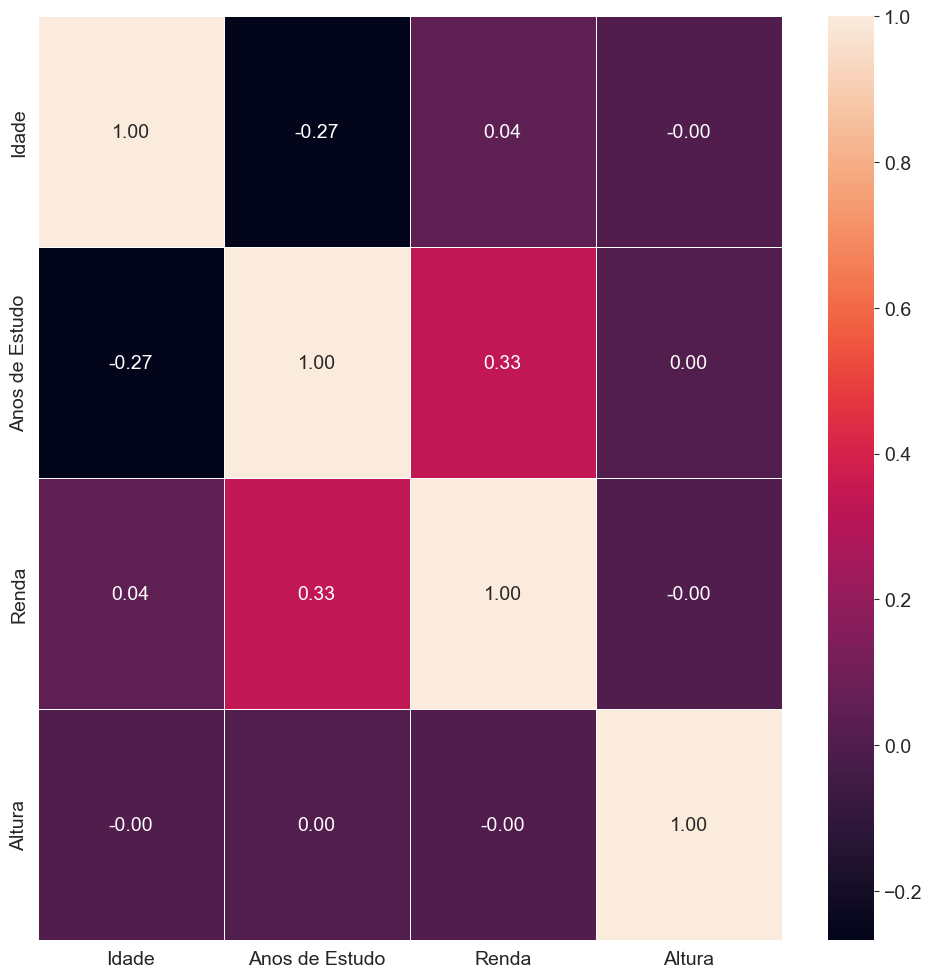

In [20]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt=".2f", ax=ax)

In [21]:
#2 - UF´s por anos de estudo?

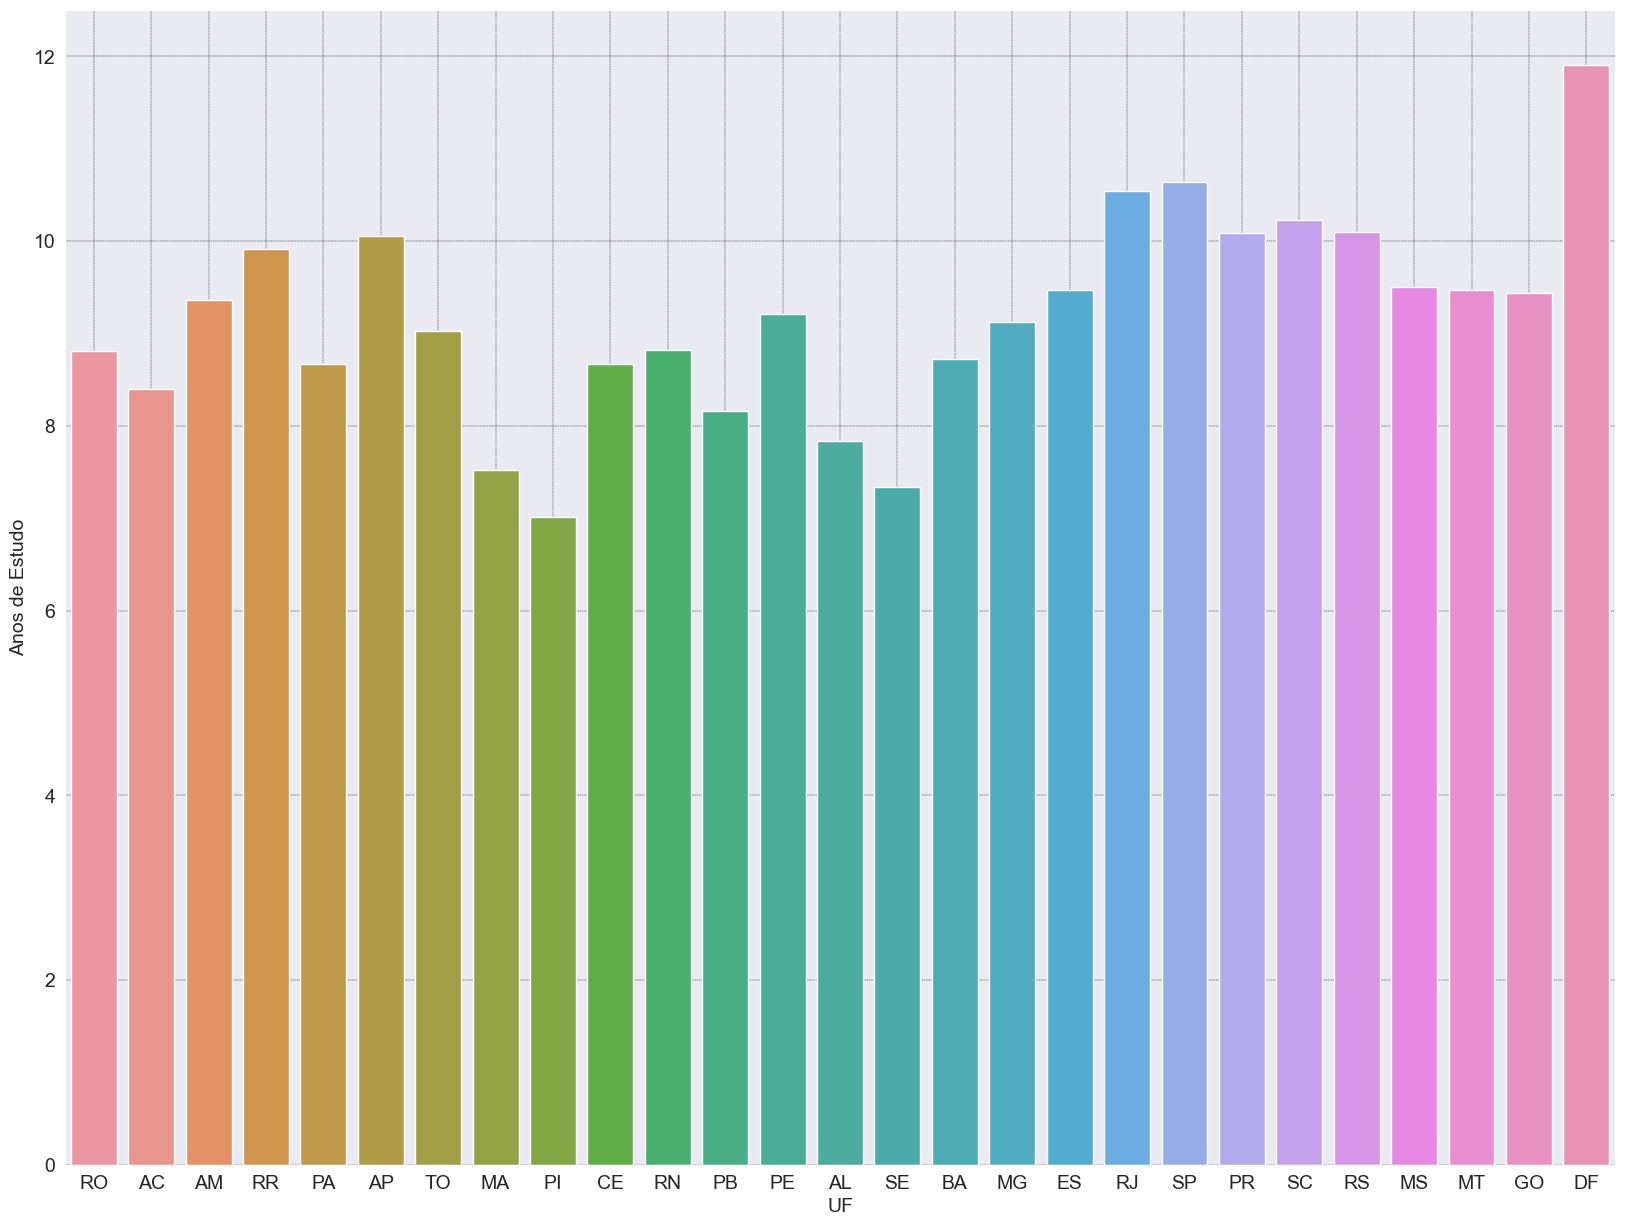

In [22]:
plt.figure(figsize=(20,15))
renda_por_uf = sns.barplot(data = df,
                           x = 'UF',
                           y = 'Anos de Estudo',
                           errorbar=('ci', False)
                           )
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3)
plt.show()


In [23]:
#3 - UF´s por renda?

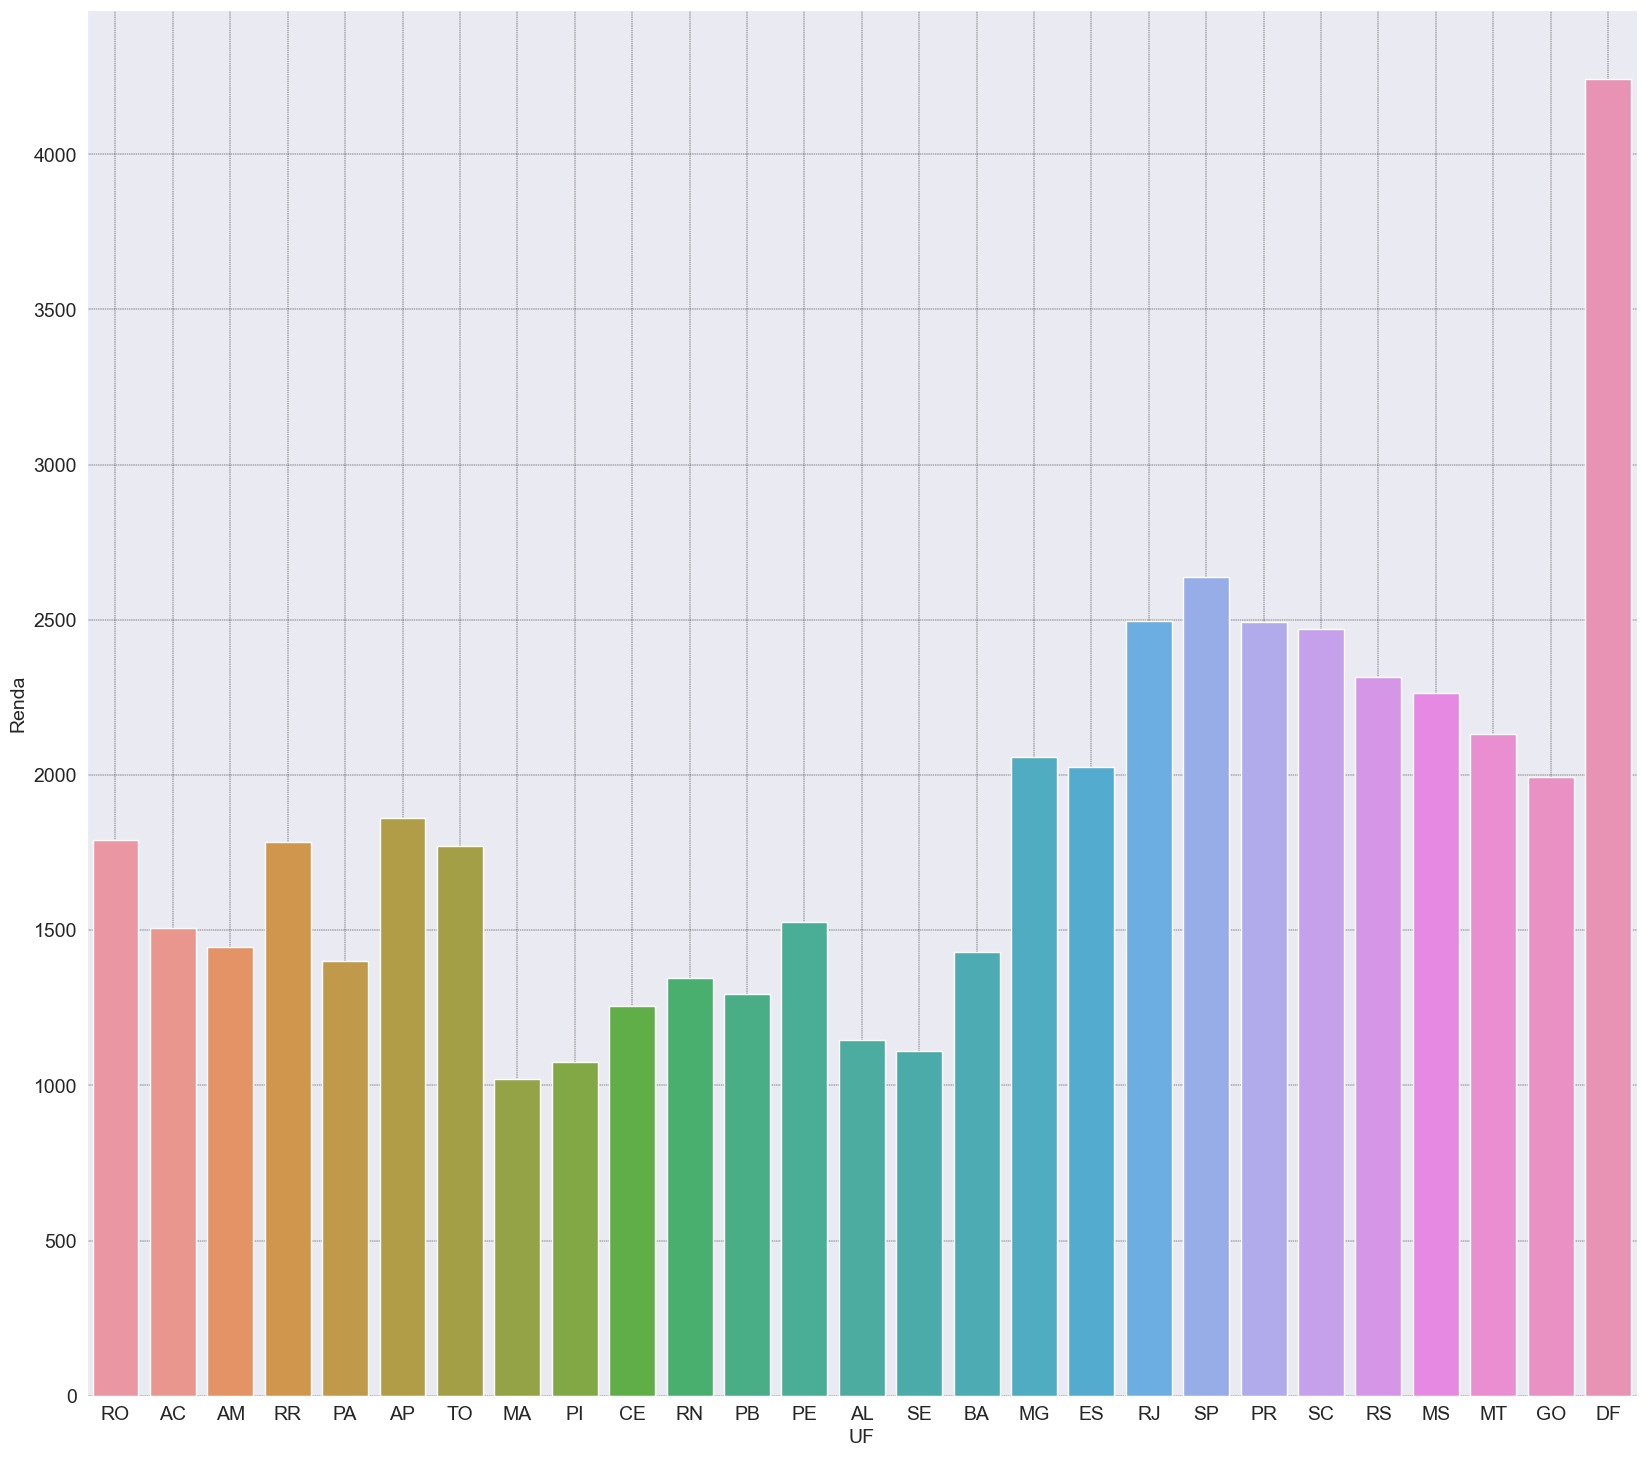

In [24]:
plt.figure( figsize=(20, 18))
renda_por_uf = sns.barplot(data = df,
                           x = 'UF',
                           y = 'Renda',
                           errorbar=('ci', False)
                           )
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3)
plt.show()

In [25]:
#4 - Número de pessoas por altura e sexo(feminino e masculino) nas UF´s

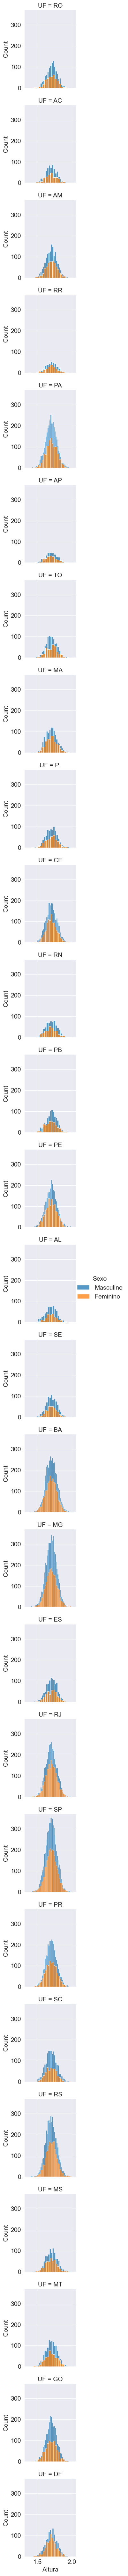

In [26]:
g = sns.FacetGrid(df, col= 'UF', hue='Sexo', col_wrap=1)
g.map(sns.histplot, 'Altura')
g.add_legend()


In [27]:
#5 - Número de pessoas por altura e Cútis nas UF´s

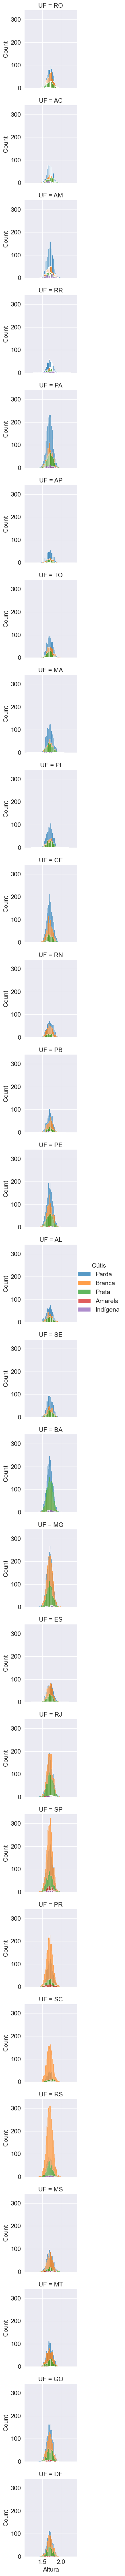

In [28]:
g = sns.FacetGrid(df, col= 'UF', hue='Cútis', col_wrap=1)
g.map(sns.histplot, 'Altura')
g.add_legend()


In [29]:
#6 - Quais os 10 Estados que mais responderam o estudo

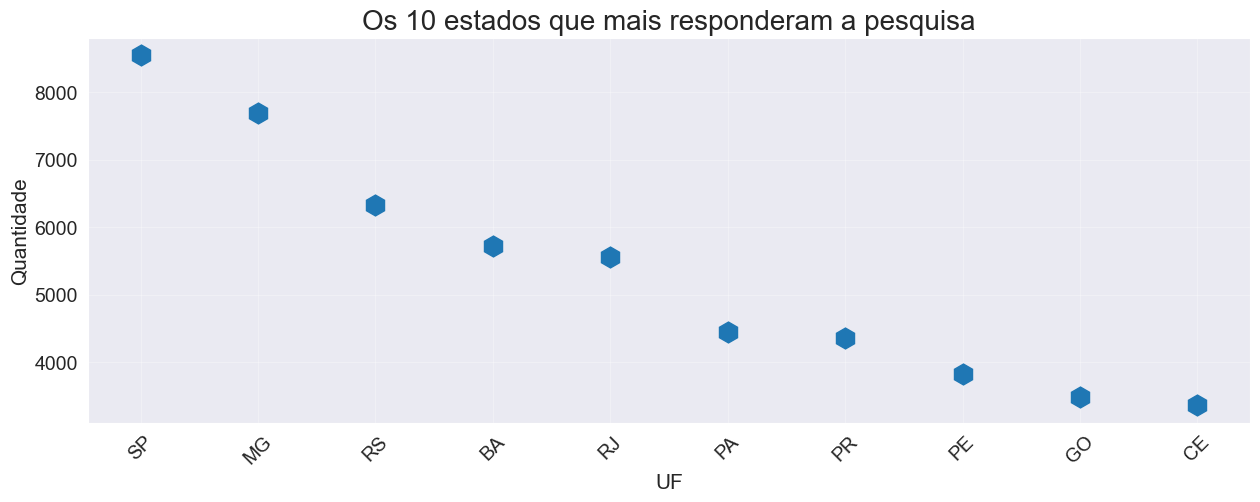

In [30]:
quantidade_pop_estudo = df['UF'].value_counts()
plt.figure(figsize=(15,5))
plt.plot(quantidade_pop_estudo.head(10), linestyle='none', markersize=15, marker='h')
plt.title('Os 10 estados que mais responderam a pesquisa', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('UF', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

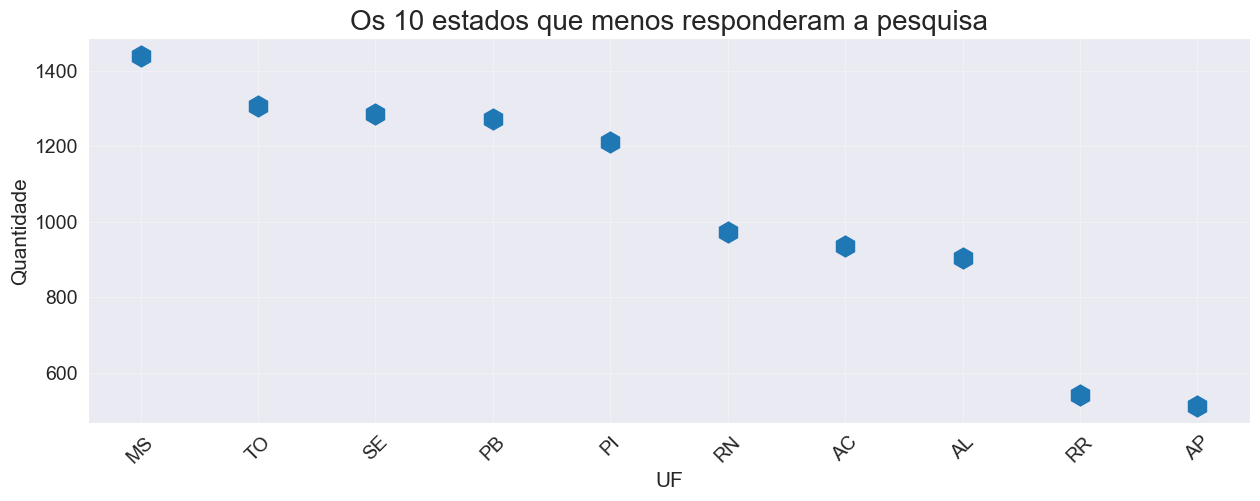

In [31]:
#7 - Quais os 10 Estados que menos responderam o estudo
quantidade_pop_estudo = df['UF'].value_counts()

plt.figure(figsize=(15,5))
plt.plot(quantidade_pop_estudo.tail(10), linestyle='none', markersize=15, marker='h')
plt.title('Os 10 estados que menos responderam a pesquisa', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('UF', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()


# Apresentação dos Resultados

1 - A correlação das variáveis pode-se observar que os anos de estudo influenciam com uma correlação relativamente baixa de 0,33.

2 - Podemos visualizar que os 4 estados onde as pessoas possuem maior número de anos de estudo, são: DF>SP>RJ>PR, assim como os 4 estados onde as pessoas possuem menor número de anos de estudo, são: PI<SE<MA<AL.

3 - Podemos visualizar que os 4 estados onde as pessoas possuem maior renda, são: DF>SP>RJ>PR, assim como os 4 estados onde as pessoas possuem menor renda, são: MA<PI<SE<AL.

4 - Pode-se visualizar que na maioria dos estados o maior número de pessoas do sexo masculino quanto a altura concentra-se em torno de 1.75m. Já quanto ao sexo feminino o maior número de pessoas concentra-se em torno de 1.60m. A população brasileira por sua predominância não é uma população alta.

5 - Os estados da região sul e São Paulo tem predominância da população de cútis branca. Já nos estados da região Norte, Nordeste e Centro-Oeste a maioria da população tem sua predominância parda. 

6 - Os 10 estados que mais responderam a pesquisa foram: SP>MG>RS>BA>RJ>PA>PR>PE>GO>CE e os 10 estados que menos responderam a pesquisa foram: AP<RR<AL<AC<RN<PI<PB<SE<TO<MS.
